# Dont do stupid stuff

In [1]:
import os
import sys

import numpy as np
import pandas as pd
from sklearn.datasets import (make_friedman1,
                              make_friedman2,
                              make_friedman3)
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

note_dir = os.getcwd()
root_dir = os.path.dirname(note_dir)
sys.path.append(root_dir)

import bonsai
from bonsai.base import *
from bonsai.utils.visuals import (plot_corr,
                                  plot_summary_grid)

## Dataset.

In [2]:
# Synthetic DataSet using sklearn
X_1, y_1 = make_friedman1(n_samples=10**4, n_features=5, noise=1.0) 
X_2, y_2 = make_friedman1(n_samples=10**4, n_features=5, noise=1.0) 

X_2 += 0.25
y_2 += 30 # Bimodal Outcome


X = np.concatenate((X_1, X_2))
y = np.concatenate((y_1, y_2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
df = pd.DataFrame(X_train)
df = df.assign(y=y_train)
df.head()

,0,1,2,3,4,y
0,0.824156,0.771985,0.937944,0.478621,1.229952,44.932143
1,0.599890,0.529411,0.371890,0.640592,0.128169,15.564267
2,0.897930,0.853916,0.392379,0.219103,0.253470,11.490872
3,0.800341,0.789637,0.834376,0.876331,0.508022,44.913622
4,0.543129,0.915900,1.112716,0.885866,0.638172,46.191831


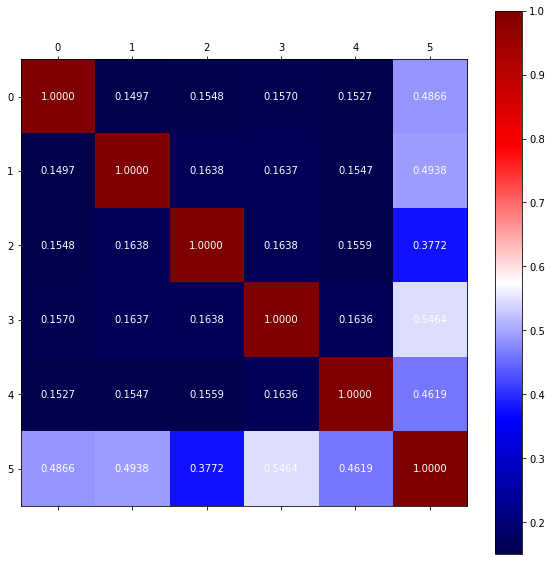

In [4]:
corr = df.corr().values
plot_corr(corr)

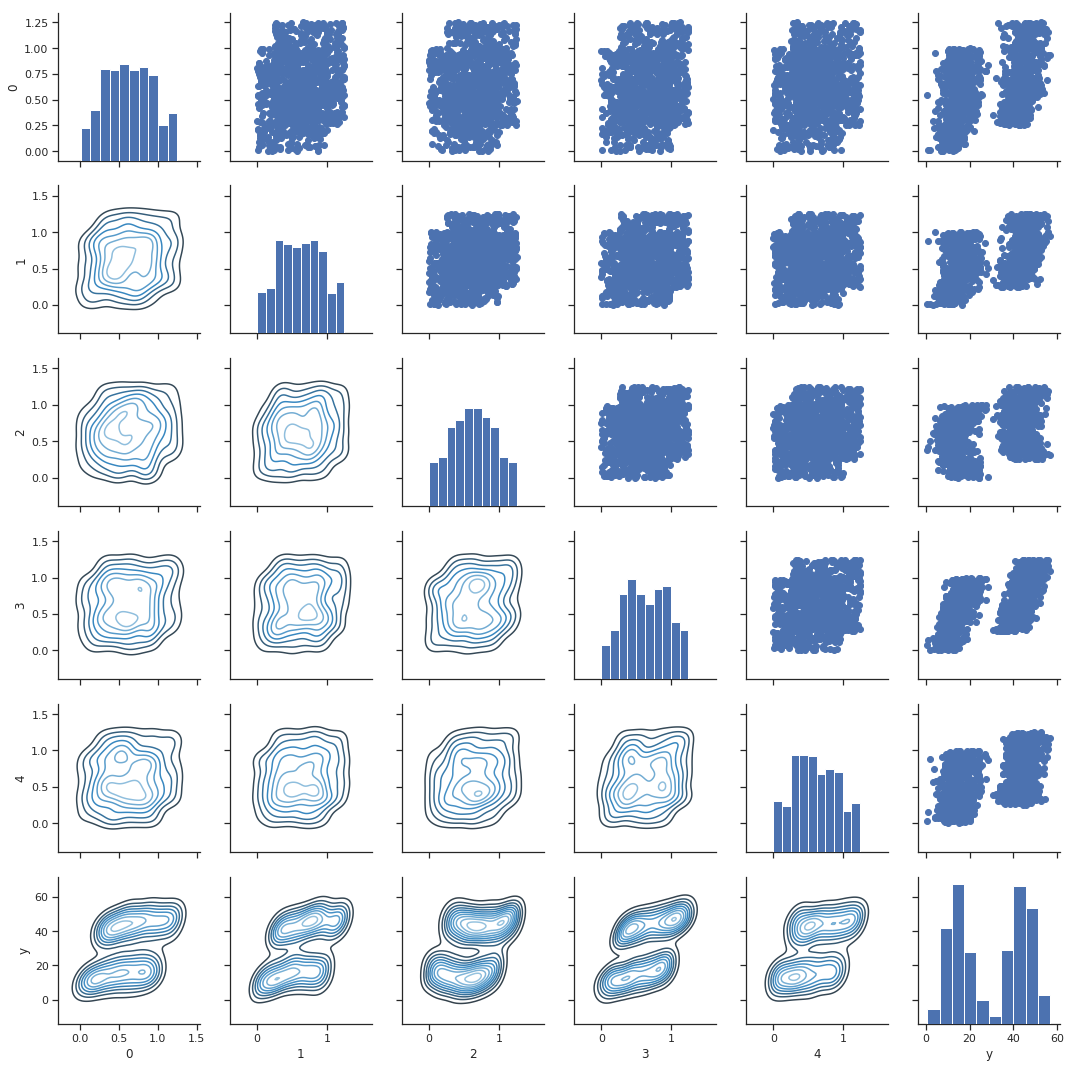

In [5]:
plot_summary_grid(df)

## Learn Tree

In [6]:
# Initialize
max_depth=6
c45tree = RegTree(max_depth=max_depth )

# Fit
c45tree.fit(X_train, y_train)

# Predict
c45_pred = c45tree.predict(X_test)

rmse_original = np.sqrt(np.mean((y_test - c45_pred)**2))
rmse_original

8.274654777250936

The ideal outcome, bimodal so our tree does not learn this


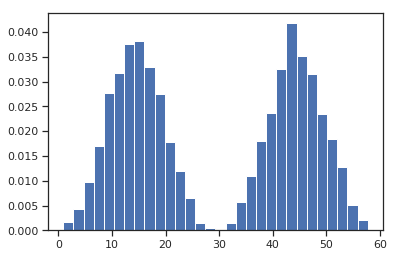

In [7]:
plt.hist(y_test, 30, density=True)
print("The ideal outcome, bimodal so our tree does not learn this")
plt.show()

C45 shows a spectrum of outcomes that at least shows the bimodal outcome


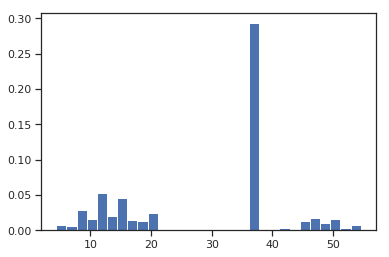

In [8]:
plt.hist(c45_pred, 30, density=True)
print("C45 shows a spectrum of outcomes that at least shows the bimodal outcome")
plt.show()

## Calculate Histograms

For each leaf, we need a histogram

In [9]:
c45tree.tree_ind

array([[ -1,   3,   0,   1,   2,  -1],
       [ -1,   3,   0,   7,   8,  -1],
       [ -1,   1,   0,   3,   4,  -1],
       [ -1,   0,   0,   5,   6,  -1],
       [ -1,   0,   0,  77,  78,  -1],
       [ -1,   4,   0,  63,  64,  -1],
       [  1,  -1,  -1,  -1,  -1,   0],
       [ -1,   1,   0,   9,  10,  -1],
       [ -1,   0,   0,  33,  34,  -1],
       [ -1,   0,   0,  11,  12,  -1],
       [ -1,   0,   0,  19,  20,  -1],
       [ -1,   4,   0,  13,  14,  -1],
       [  1,  -1,  -1,  -1,  -1,   1],
       [ -1,   3,   0,  15,  16,  -1],
       [ -1,   2,   0,  17,  18,  -1],
       [  1,  -1,  -1,  -1,  -1,   2],
       [  1,  -1,  -1,  -1,  -1,   3],
       [  1,  -1,  -1,  -1,  -1,   4],
       [  1,  -1,  -1,  -1,  -1,   5],
       [ -1,   0,   0,  21,  22,  -1],
       [ -1,   4,   0,  27,  28,  -1],
       [ -1,   4,   0,  23,  24,  -1],
       [ -1,   1,   0,  25,  26,  -1],
       [  1,  -1,  -1,  -1,  -1,   6],
       [  1,  -1,  -1,  -1,  -1,   7],
       [  1,  -1,  -1,  -

In [10]:
c45tree.tree_val

array([[ 1.00090583, -1.        ],
       [ 0.24908749, -1.        ],
       [ 0.54180137, -1.        ],
       [ 0.85452238, -1.        ],
       [ 0.56650006, -1.        ],
       [ 0.80076085, -1.        ],
       [-1.        , 46.71126836],
       [ 0.31729815, -1.        ],
       [ 0.24918733, -1.        ],
       [ 0.56650006, -1.        ],
       [ 0.28335947, -1.        ],
       [ 0.48827262, -1.        ],
       [-1.        ,  9.12242198],
       [ 0.17097649, -1.        ],
       [ 0.18077006, -1.        ],
       [-1.        ,  4.7422941 ],
       [-1.        ,  6.53514665],
       [-1.        ,  9.86786281],
       [-1.        ,  7.15345539],
       [ 0.12714398, -1.        ],
       [ 0.58104256, -1.        ],
       [ 0.36132427, -1.        ],
       [ 0.68821652, -1.        ],
       [-1.        ,  4.36480746],
       [-1.        ,  7.76026836],
       [-1.        ,  8.31161782],
       [-1.        , 10.58021466],
       [ 0.14659465, -1.        ],
       [ 0.08800822,

In [11]:
help(c45tree.predict)

Help on method predict in module bonsai.core.bonsaic:

predict(X, output_type='response') method of bonsai.base.regtree.RegTree instance
    Predict y by applying the trained tree to X.
    
    Args:
        X:
        output_type:    str, default="response"
                        - response: Function yields predicted value
                        - index:    Function yields indices of nodes.
    
    Returns:



In [12]:
out = c45tree.predict(X_test, output_type="index")

In [13]:
np.unique(out).astype(int)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

In [14]:
c45tree.get_histograms(X_train, y_train)

In [15]:
c45tree.histograms

[(array([ 7, 24, 32, 43, 51, 38, 27, 13,  3,  1]),
  array([39.74002576, 41.38829116, 43.03655657, 44.68482198, 46.33308739,
         47.98135279, 49.6296182 , 51.27788361, 52.92614901, 54.57441442,
         56.22267983])),
 (array([ 4,  7, 28, 35, 52, 51, 37, 24, 10,  9]),
  array([ 1.0506673 ,  2.62500507,  4.19934283,  5.77368059,  7.34801835,
          8.92235611, 10.49669387, 12.07103163, 13.6453694 , 15.21970716,
         16.79404492])),
 (array([ 7,  7, 21, 26, 32, 13, 15,  2,  1,  3]),
  array([ 0.12769386,  1.25145541,  2.37521697,  3.49897852,  4.62274007,
          5.74650162,  6.87026317,  7.99402472,  9.11778627, 10.24154783,
         11.36530938])),
 (array([ 1,  7,  3, 11,  9,  7, 11,  4,  3,  2]),
  array([ 2.47121113,  3.31259144,  4.15397174,  4.99535205,  5.83673236,
          6.67811266,  7.51949297,  8.36087328,  9.20225358, 10.04363389,
         10.8850142 ])),
 (array([2, 1, 4, 8, 6, 2, 0, 2, 0, 1]),
  array([ 7.04750001,  7.76177425,  8.47604849,  9.19032273,  9

## Calculate Kernel Density

In [16]:
c45tree.get_kdes(X_train, y_train, kernel="gaussian")

In [17]:
c45tree.kdes

[KernelDensity(algorithm='auto', atol=0, bandwidth=0.3344416980611975,
        breadth_first=True, kernel='gaussian', leaf_size=40,
        metric='euclidean', metric_params=None, rtol=0),
 KernelDensity(algorithm='auto', atol=0, bandwidth=0.32961986360230283,
        breadth_first=True, kernel='gaussian', leaf_size=40,
        metric='euclidean', metric_params=None, rtol=0),
 KernelDensity(algorithm='auto', atol=0, bandwidth=0.37952400977185097,
        breadth_first=True, kernel='gaussian', leaf_size=40,
        metric='euclidean', metric_params=None, rtol=0),
 KernelDensity(algorithm='auto', atol=0, bandwidth=0.4439299043453304,
        breadth_first=True, kernel='gaussian', leaf_size=40,
        metric='euclidean', metric_params=None, rtol=0),
 KernelDensity(algorithm='auto', atol=0, bandwidth=0.5212011081386488,
        breadth_first=True, kernel='gaussian', leaf_size=40,
        metric='euclidean', metric_params=None, rtol=0),
 KernelDensity(algorithm='auto', atol=0, bandwidth=0.

In [18]:
c45_probas = c45tree.predict_proba(X_test, y_test)

(61,)
(73,)
(29,)
(14,)
(6,)
(31,)
(17,)
(30,)
(26,)
(21,)
(20,)
(116,)
(7,)
(95,)
(17,)
(66,)
(3,)
(67,)
(88,)
(59,)
(67,)
(28,)
(78,)
(63,)
(75,)
(66,)
(118,)
(92,)
(165,)
(1961,)
(8,)
(17,)
(6,)
(8,)
(12,)
(29,)
(1,)
(3,)
(5,)
(6,)
(23,)
(7,)
(23,)
(48,)
(2,)
(15,)
(70,)
(4,)
(4,)
(25,)
(104,)
(4,)
(17,)


In [19]:
np.min(c45_probas), np.max(c45_probas), np.mean(c45_probas)

(1.004954704381915e-12, 0.3551788909348017, 0.0745846098116101)

Probabilities of the test set


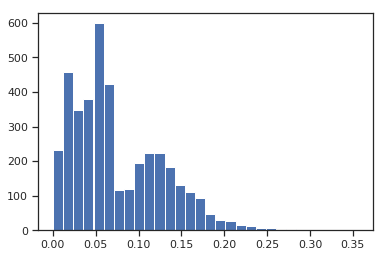

In [25]:
plt.hist(c45_probas, 30)
print("Probabilities of the test set")
plt.show()

In [21]:
x = np.zeros((100,2))
x.shape

(100, 2)

In [22]:
x.reshape(-1,1).shape

(200, 1)

In [23]:
np.atleast_2d(y).T

array([[15.72977758],
       [16.44491397],
       [ 8.44534485],
       ...,
       [46.39752156],
       [43.93628905],
       [42.13138854]])

In [24]:
y.reshape(-1,1).shape

(20000, 1)